### a)
For the first principal component, the variance is 4.228 as we can see. As k increases, the variance decreases. I obtained this via the Python code below:

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def performPCA(k, X):
    #Takes in k number of components and X dataset and performs PCA
    pca = PCA(n_components=k)
    pca.fit(X)
    X = pca.transform(X)
    print("Variance for each component: ", pca.explained_variance_)
    return X



iris = load_iris()
X = iris.data
y = iris.target


performPCA(4, X);

Variance for each component:  [4.22824171 0.24267075 0.0782095  0.02383509]


### b)
To apply standardization, I used the StandardScaler:

In [6]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X)
X_std = std_scale.transform(X)
performPCA(4, X_std);

Variance for each component:  [2.93808505 0.9201649  0.14774182 0.02085386]


As we can see, the variance with standardization is initially lower than the variance without standardization for k=1 components. This makes sense because standardization can reduce variance by moving the data towards the center.

### c)

Variance for each component:  [2.93808505 0.9201649 ]


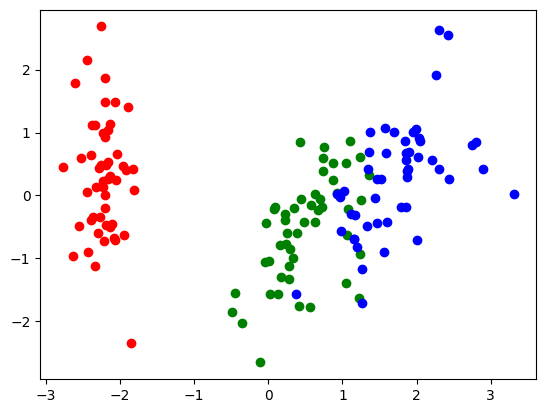

In [7]:
X_projected = performPCA(2, X_std)

colors = 'rgb'
for i, point in enumerate(X_projected):
    color = 'r' if y[i] == 0 else 'g' if y[i] == 1 else 'b'
    plt.scatter(X_projected[i][0], X_projected[i][1], c=color)
plt.show()

Here, we can see the three iris clusters, displayed as red, blue, and green.

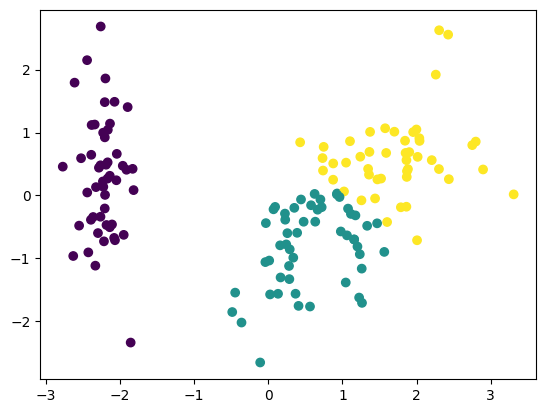

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit(X_projected)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=km.labels_)
plt.show()

We have clustered the data into three clusters by utilizing the KMeans algorithm from scikit-learn. Each color that has been plotted represents the data points assigned to each cluster. As we can see, the clusters formed from the algorithm is not the same as the "true" clusters shown in part (c), and thus there is an error. 